In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("GA_data/CreditCardData.csv",",")

C:\Users\gassaf\AppData\Local\Temp\ipykernel_16460\32203442.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df=pd.read_csv("GA_data/CreditCardData.csv",",")


In [5]:
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Total_Revolving_Bal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,12691.0,777
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,8256.0,864
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,3418.0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3313.0,2517
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,4716.0,0


In [6]:
df=df.loc[df['Income_Category']!='Unknown']
df=df.loc[df['Marital_Status']!='Unknown']
df=df.loc[df['Education_Level']!='Unknown']

df_clean = df.drop(df[(df["Income_Category"]=="Unknown") | (df["Marital_Status"]=="Unknown") | (df["Education_Level"]=="Unknown")].index,axis=0)

In [7]:
df_blue=df[df['Card_Category']=="Blue"]
df_blue

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Total_Revolving_Bal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,12691.0,777
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,8256.0,864
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,3418.0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,4716.0,0
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,4010.0,1247
...,...,...,...,...,...,...,...,...,...,...,...,...
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,17925.0,1909
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,13940.0,2109
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,3688.0,606
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,4003.0,1851


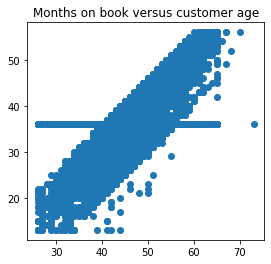

In [42]:
x = df_blue['Customer_Age']
y = df_blue['Months_on_book']
plt.gca().set_aspect('equal', adjustable='box') # Orthonormal axes
plt.scatter(x, y)
plt.title('Months on book versus customer age')
plt.show()

Text(0.5, 1.0, 'Histograme for Customer Age')

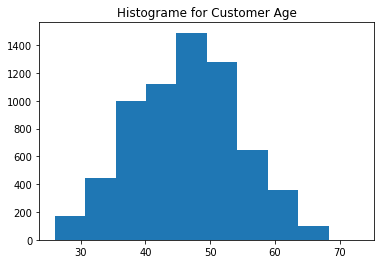

In [45]:
plt.hist(df_blue['Customer_Age'])
plt.title('Histograme for Customer Age')

array([[<AxesSubplot:title={'center':'Customer_Age'}>]], dtype=object)

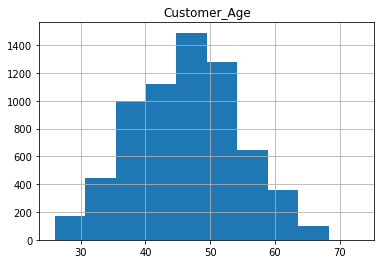

In [48]:
df_blue.hist(column="Customer_Age", bins=10)

In [47]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

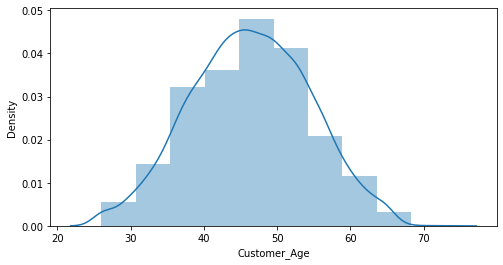

In [51]:
plt.figure(figsize=(8, 4))

sns.distplot(
   df_blue['Customer_Age'],
    bins=10,
    hist=True,

)

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

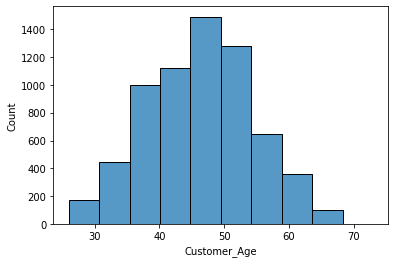

In [53]:
sns.histplot(data = df_blue, x = "Customer_Age",bins=10)

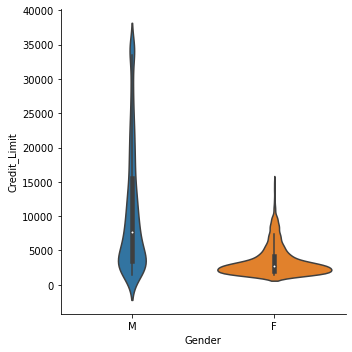

In [54]:
sns.catplot(x='Gender', y='Credit_Limit', data=df_blue, kind="violin") 

<AxesSubplot:xlabel='count', ylabel='Income_Category'>

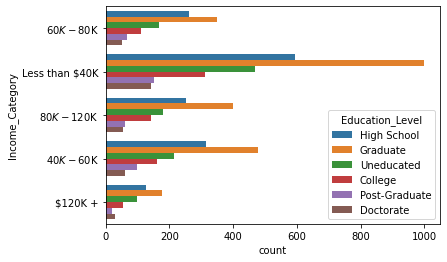

In [57]:
order_education = ["Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"]
order_income = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]

order_education = ["Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"]
order_income = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
#sns.countplot(data=df_blue,y="Income_Category",hue="Education_Level",hue_order=order_education,order=order_income)
sns.countplot(data=df_blue,y="Income_Category",hue="Education_Level")

array([<AxesSubplot:xlabel='Customer_Age'>,
       <AxesSubplot:xlabel='Customer_Age'>,
       <AxesSubplot:xlabel='Customer_Age'>], dtype=object)

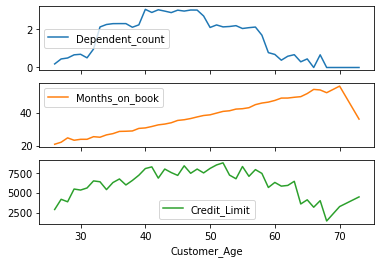

In [58]:
df_blue.groupby(["Customer_Age"]).mean().plot(y=["Dependent_count","Months_on_book","Credit_Limit"],subplots=True)